# QUESTION 1

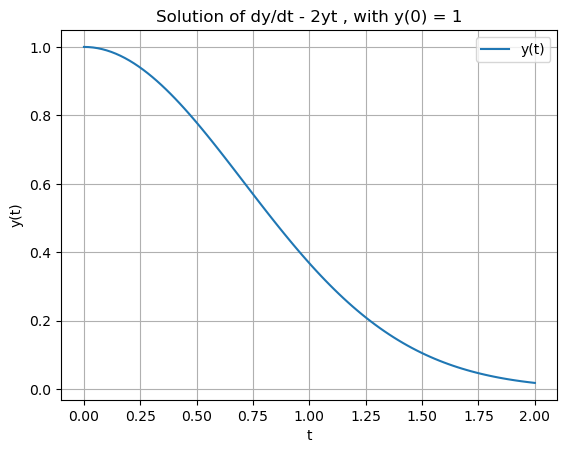

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# DEfine ODE Function
def ode_function(y,t):
    dydt = -2*y*t
    return dydt

#Defining intial condition
intial_condition = 1.0

# setting interval to integrate
t_points = np.linspace(0,2,100)

#solving ODE with ode_function
solution= odeint(ode_function, intial_condition,t_points)

#plotting the solution
plt.plot(t_points, solution, label ='y(t)')
plt.title('Solution of dy/dt - 2yt , with y(0) = 1')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)
plt.show()


# QUESTION 2

In [77]:
#import necessary libraries
import numpy as np
import scipy as sc

In [78]:
#define coefficient of matrix A
A = np.array([[2,4,6],[5,3,2],[7,8,9]])


In [79]:
print(A)

[[2 4 6]
 [5 3 2]
 [7 8 9]]


In [80]:
#define coefficient of matrix B
B= np.array ([[18],[13],[30]])

In [81]:
print(B)

[[18]
 [13]
 [30]]


In [72]:
# Use solve function to find solution vector of matrix directly
C= np.linalg.solve(A,B)

In [73]:
print(C)

[[ 4.5]
 [-7.5]
 [ 6.5]]


In [74]:
#ALternatively calculate inv A and multiply with B to find solution vector of the matrix
C= np.linalg.inv(A).dot(B)

In [75]:
print(C)

[[ 4.5]
 [-7.5]
 [ 6.5]]


# QUESTION 3


In [89]:
import requests
import matplotlib.pyplot as plt

def get_weather_data(latitude, longitude, timezone, forecast_days):
    url = "https://api.open-meteo.com/v1/forecast?latitude=2.5&longitude=112.5&hourly=temperature_2m&timezone=Asia%2FSingapore&forecast_days=1"
    params = {
        "latitude": latitude,
        "longitude": longitude,
        "timezone": timezone,
        "hourly": "temperature_2m",
        "forecast_days": forecast_days
    }

    response = requests.get(url, params=params)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: Unable to retrieve weather data. Status code: {response.status_code}")
        return None

def plot_temperature_trend(weather_data, forecast_days):
    hourly_data = weather_data["hourly"]["temperature_2m"]

    times = [entry["timestamp"] for entry in hourly_data]
    temperatures = [entry["value"] for entry in hourly_data]

    plt.plot(times, temperatures, marker='o', linestyle='-', color='b')
    plt.xlabel("Time")
    plt.ylabel("Temperature (°C)")
    plt.title(f"Hourly Temperature Trend\nLatitude: {latitude}, Longitude: {longitude}, Forecast Days: {forecast_days}")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

def main():
    valid_days_range = range(1, 17)

    # Get user input for the number of forecast days
    while True:
        try:
            forecast_days = int(input("Enter the number of forecast days (1-16): "))
            if forecast_days in valid_days_range:
                break
            else:
                print("Invalid input. Please enter a number between 1 and 16.")
        except ValueError:
            print("Invalid input. Please enter a valid number.")

    # Specify location details
    latitude = 2.375
    longitude = 112.5
    timezone = "Asia/Singapore"

    # Get weather data
    weather_data = get_weather_data(latitude, longitude, timezone, forecast_days)

    if weather_data:
        # Plot temperature trend
        plot_temperature_trend(weather_data, forecast_days)

if __name__ == "__main__":
    main()


Enter the number of forecast days (1-16): 2


TypeError: list indices must be integers or slices, not str